# Assignment 1  Kaplan-Meier Curves

**1)** Create a small synthetic event-time dataset with follow up times and event indicators (0 = censored, 1 = event has occured).

|Time|Status|
|----|------|
|   1|     1|
|   1|     1|
|   2|     1|
|   2|     0|
|   2|     0|
|   3|     1|
|   5|     1|
|   6|     0|
|   8|     1|
|  10|     0|

**2)** Draw the Kaplan-Meier curve for the data defined in 1) on a piece of paper.

|DAYS|#ALIVE|#DIED|P(DYING)  |P(SURVIVING)  |
|----|------|-----|----------|--------------|
|   0|    10|    0|    0/10=0|       10/10=1|
|   1|    10|    2|  2/10=0.2|   1(8/10)=0.8|
|   2|     8|    1| 1/8=0.125|  0.8(7/8)=0.7|
|   3|     5|    1|   1/5=0.2| 0.7(4/5)=0.56|
|   5|     4|    1|  1/4=0.25|0.56(3/4)=0.42|
|   8|     2|    1|   1/2=0.5|0.43(1/2)=0.21|
|  11|     0|    0|         0|             0|

![Kaplan-Meier Curve](../img/capmeier.jpeg)

**3)** Implement a function in Julia to calculate the Kaplan-Meier curve, and plot the curve for the data in 1).

In [37]:
using PlotlyJS

function KMCplot(t, p)

    plot(
        scatter(
            hoverinfo="text+name", 
            mode="lines", 
            x=t, 
            y=p, 
            name="Kaplan-Meier Curve", 
            line_shape="hv"
        )
    )
end

KMCplot (generic function with 2 methods)

In [ ]:
function KMCPlot(t, p, c)
    
    trace1 = scatter(
                hoverinfo="text+name", 
                mode="lines", 
                x=t, 
                y=p, 
                name="Kaplan-Meier Curve", 
                line_shape="hv"
            )

    trace2 = scatter(
                hoverinfo="text+name", 
                mode="markers", 
                x=t, 
                y=c 
            )
    
    plot([trace1, trace2])
    
end

In [33]:
function KaplanMeierCurve(t, status)
    
    days = [0]
    nAlive = [length(t)]
    nDied = [0]
    nCensored = [0]
    pDying = [0]
    pSurviving = Float64[1]

    total = length(t)
    for i in 2:length(t)
        if (!(t[i] in days) && (status[i] != 0))
            push!(days, t[i])
            push!(nDied, 1)
            push!(nAlive, total)

            if (i == 2)
                push!(nAlive, total)
                nDied[end] += 1
                nAlive[end] -= 1
                total -= 1
            
            end

            nAlive[end] -= 1
            
        elseif (t[i] in days && status[i] != 0)
            nDied[end] += 1
            nAlive[end] -= 1

        else
            nAlive[end] -= 1
        end

        total -= 1
    end

    for i in 2:length(nDied)
        push!(pSurviving, pSurviving[end] * ((nAlive[i] - nDied[i]) / nAlive[i]))
    end

    push!(pSurviving, pSurviving[end])
    push!(days, t[end])

    deleteat!(pSurviving, 1)
    deleteat!(days, 1)

    KMCplot(days, pSurviving)

    #=
    println("days ", days)
    println("nDied ", nDied), 
    println("nAlive ", nAlive)
    println("pSurviving ", pSurviving)
    =#
end

KaplanMeierCurve (generic function with 1 method)

t: [1, 2, 3, 5, 8, 10]
p: [0.8, 0.7000000000000001, 0.56, 0.42000000000000004, 0.21000000000000002, 0.21000000000000002]


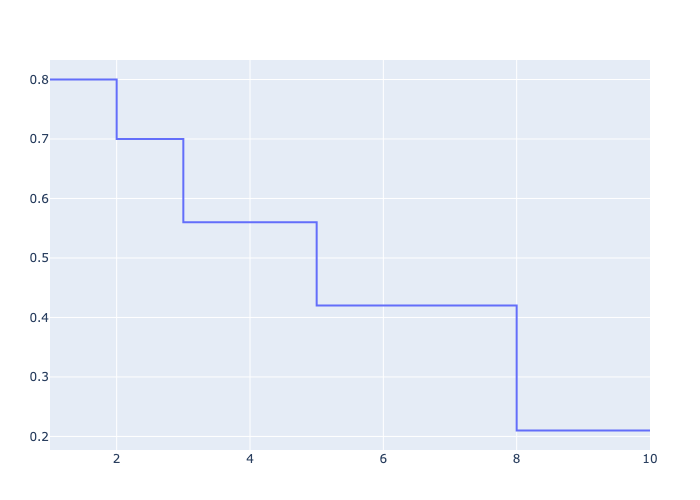

In [38]:
d_time = [1, 1, 2, 2, 2, 3, 5, 6, 8, 10]
d_status = [1, 1, 1, 0, 0, 1, 1, 0, 1, 0]

KaplanMeierCurve(d_time, d_status)

**4)** Check that the Kaplan-Meier curves on paper and in Julia match.